In [ ]:
import numpy as np
import os
import essentia
import essentia.standard as es
import numpy_rms
from scipy.signal import hilbert

import matplotlib.pyplot as plt

SSL_DSET_PATH = '/Volumes/Production Tools/coding_projs/THESIS/data_preprocesses/data/Diff-SSL-G-Comp'

DRY_PATH = 'processed_normalized'
WET_PATH = 'processed_ground_truth'

SR = 44100

def load_audio(path):
    audio = es.MonoLoader(filename=path, sampleRate=SR)()
    return audio

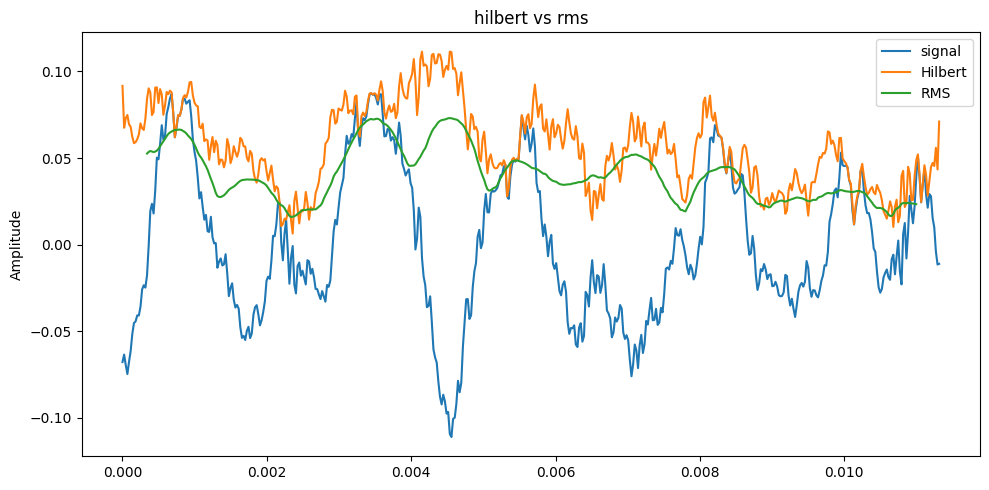

In [52]:
t_start = 61
t_length = 500

def window_rms(a, window_size):
  a2 = np.square(a)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

audio = load_audio('/Volumes/Production Tools/coding_projs/THESIS/data_preprocesses/data/Diff-SSL-G-Comp/processed_normalized/NosPalpitants_UnmasteredWAV.wav')
audio = audio[t_start*SR:t_start*SR+t_length]

analytic_signal = hilbert(audio)
amplitude_envelope = np.abs(analytic_signal)
#amplitude_envelope = 20 * np.log10(amplitude_envelope)

window_size = 30
rms_series = window_rms(audio, window_size)

t = np.arange(len(audio)) / SR


fig, ax = plt.subplots(nrows=1, sharex='all', tight_layout=True, figsize=(10, 5))
ax.set_title("hilbert vs rms")
ax.set_ylabel("Amplitude")
ax.plot(t, audio, label='signal')
ax.plot(t, amplitude_envelope, label='Hilbert')
ax.plot(t[window_size//2:-window_size//2+1], rms_series, label='RMS')
ax.legend()
plt.show()


44


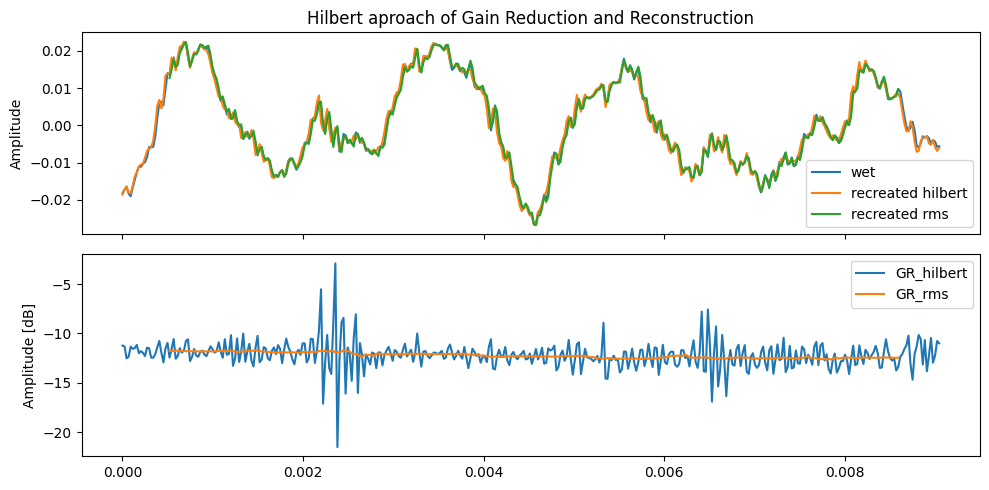

In [82]:
t_start = 61
t_length = 400
window_size = int(SR/1000)
print(window_size)

audio = load_audio('/Volumes/Production Tools/coding_projs/THESIS/data_preprocesses/data/Diff-SSL-G-Comp/processed_normalized/NosPalpitants_UnmasteredWAV.wav')
audio = audio[t_start*SR:t_start*SR+t_length]

audio_wet = load_audio('/Volumes/Production Tools/coding_projs/THESIS/data_preprocesses/data/Diff-SSL-G-Comp/processed_ground_truth/threshold_-12_attack_30_release_0.4_ratio_10/NosPalpitants-exported.wav')
audio_wet = audio_wet[t_start*SR:t_start*SR+t_length]

analytic_signal = hilbert(audio)
amplitude_envelope = np.abs(analytic_signal)
amplitude_envelope = 20 * np.log10(amplitude_envelope)
rms_series = window_rms(audio, window_size)
rms_series_dB = 20 * np.log10(rms_series)

analytic_signal_wet = hilbert(audio_wet)
amplitude_envelope_wet = np.abs(analytic_signal_wet)
amplitude_envelope_wet = 20 * np.log10(amplitude_envelope_wet)
rms_series_wet = window_rms(audio_wet, window_size)
rms_series_wet_dB = 20 * np.log10(rms_series_wet)
t = np.arange(len(audio)) / SR

gr_dB = amplitude_envelope_wet-amplitude_envelope
gr = 10**(gr_dB/20)

gr_rms = rms_series_wet_dB-rms_series_dB
rms = 10**(gr_rms/20)

recreated_signal = audio*gr
recreated_signal_rms = audio[window_size//2:-window_size//2+1]*rms
fig, ax = plt.subplots(nrows=2, sharex='all', tight_layout=True, figsize=(10, 5))
ax[0].set_title("Hilbert aproach of Gain Reduction and Reconstruction")
ax[0].set_ylabel("Amplitude")
#ax[0].plot(t, audio, label='dry')
ax[0].plot(t, audio_wet, label='wet')
ax[0].plot(t, recreated_signal, label='recreated hilbert')
ax[0].plot(t[window_size//2+1:-window_size//2+2], recreated_signal_rms, label='recreated rms')
#ax[1].plot(t, amplitude_envelope, label='Envelope')
#ax[1].plot(t, amplitude_envelope_wet, label='Envelope wet')
ax[1].plot(t, gr_dB, label='GR_hilbert')
ax[1].plot(t[window_size//2+1:-window_size//2+2], gr_rms, label='GR_rms')
ax[1].set_ylabel("Amplitude [dB]")
ax[0].legend()
ax[1].legend()
plt.show()

44


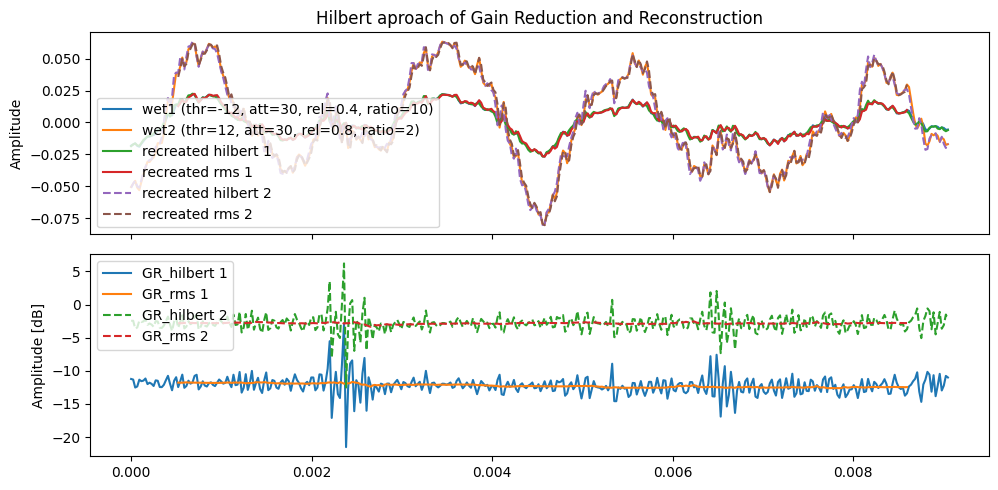

In [81]:
t_start = 61
t_length = 400
window_size = int(SR/1000)
print(window_size)

audio = load_audio('/Volumes/Production Tools/coding_projs/THESIS/data_preprocesses/data/Diff-SSL-G-Comp/processed_normalized/NosPalpitants_UnmasteredWAV.wav')
audio = audio[t_start*SR:t_start*SR+t_length]

audio_wet = load_audio('/Volumes/Production Tools/coding_projs/THESIS/data_preprocesses/data/Diff-SSL-G-Comp/processed_ground_truth/threshold_-12_attack_30_release_0.4_ratio_10/NosPalpitants-exported.wav')
audio_wet = audio_wet[t_start*SR:t_start*SR+t_length]

audio_wet2 = load_audio('/Volumes/Production Tools/coding_projs/THESIS/data_preprocesses/data/Diff-SSL-G-Comp/processed_ground_truth/threshold_12_attack_30_release_0.8_ratio_2/NosPalpitants-exported.wav')
audio_wet2 = audio_wet2[t_start*SR:t_start*SR+t_length]

analytic_signal = hilbert(audio)
amplitude_envelope = np.abs(analytic_signal)
amplitude_envelope = 20 * np.log10(amplitude_envelope)
rms_series = window_rms(audio, window_size)
rms_series_dB = 20 * np.log10(rms_series)

analytic_signal_wet = hilbert(audio_wet)
amplitude_envelope_wet = np.abs(analytic_signal_wet)
amplitude_envelope_wet = 20 * np.log10(amplitude_envelope_wet)
rms_series_wet = window_rms(audio_wet, window_size)
rms_series_wet_dB = 20 * np.log10(rms_series_wet)

analytic_signal_wet2 = hilbert(audio_wet2)
amplitude_envelope_wet2 = np.abs(analytic_signal_wet2)
amplitude_envelope_wet2 = 20 * np.log10(amplitude_envelope_wet2)
rms_series_wet2 = window_rms(audio_wet2, window_size)
rms_series_wet2_dB = 20 * np.log10(rms_series_wet2)

t = np.arange(len(audio)) / SR

gr_dB = amplitude_envelope_wet-amplitude_envelope
gr = 10**(gr_dB/20)

gr_rms = rms_series_wet_dB-rms_series_dB
rms = 10**(gr_rms/20)

gr_dB2 = amplitude_envelope_wet2-amplitude_envelope
gr2 = 10**(gr_dB2/20)

gr_rms2 = rms_series_wet2_dB-rms_series_dB
rms2 = 10**(gr_rms2/20)

recreated_signal = audio*gr
recreated_signal_rms = audio[window_size//2:-window_size//2+1]*rms

recreated_signal2 = audio*gr2
recreated_signal_rms2 = audio[window_size//2:-window_size//2+1]*rms2
fig, ax = plt.subplots(nrows=2, sharex='all', tight_layout=True, figsize=(10, 5))
ax[0].set_title("Hilbert aproach of Gain Reduction and Reconstruction")
ax[0].set_ylabel("Amplitude")
#ax[0].plot(t, audio, label='dry')
ax[0].plot(t, audio_wet, label='wet1 (thr=-12, att=30, rel=0.4, ratio=10)')
ax[0].plot(t, audio_wet2, label='wet2 (thr=12, att=30, rel=0.8, ratio=2)')
ax[0].plot(t, recreated_signal, label='recreated hilbert 1')
ax[0].plot(t[window_size//2+1:-window_size//2+2], recreated_signal_rms, label='recreated rms 1')
ax[0].plot(t, recreated_signal2, label='recreated hilbert 2', linestyle='--')
ax[0].plot(t[window_size//2+1:-window_size//2+2], recreated_signal_rms2, label='recreated rms 2', linestyle='--')
#ax[1].plot(t, amplitude_envelope, label='Envelope')
#ax[1].plot(t, amplitude_envelope_wet, label='Envelope wet')
ax[1].plot(t, gr_dB, label='GR_hilbert 1')
ax[1].plot(t[window_size//2+1:-window_size//2+2], gr_rms, label='GR_rms 1')
ax[1].plot(t, gr_dB2, label='GR_hilbert 2', linestyle='--')
ax[1].plot(t[window_size//2+1:-window_size//2+2], gr_rms2, label='GR_rms 2', linestyle='--')
ax[1].set_ylabel("Amplitude [dB]")
ax[0].legend()
ax[1].legend()
plt.show()